# Gradient Descent

An optimization problem has an objective function that is defined in terms of a set of variables, referred to as optimization variables. The goal of the optimization problem is to compute the values of the variables at which the objective function is either maximized or minimized. It is common to use a minimization form of the objective function in machine learning, and the corresponding objective function is often referred to as a loss function. Note that the term “loss function” often (semantically) refers to an objective function with certain types of properties quantifying a nonnegative “cost” associated with a particular configuration of variables. This term is used in the econometrics, statistics, and the machine learning communities, although the term “objective function” is a more general concept than the term “loss function.” For example, a loss function is always associated with a minimization objective function, and it is often interpreted as a cost with a nonnegative value. Most objective functions in machine learning are multivariate loss functions over many variables. First, we will consider the simple case of optimization functions defined on a single variable.


In this JNB, we assume that all functions are differentiable and we are unable to analytically find a solution in closed form.

## Review of optimization of single variable functions

__Example 1:__ Find the optimal value $x^*\in [-2, 3]$ that gives the minimum of $f(x) = 2x^3 -2x$. 

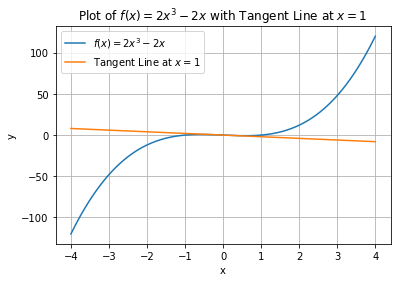

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x ** 3 - 2 * x

# Define the tangent line at x = 0
def tangent_line(x):
    return -2 * x  # The tangent line at x = 0 is the x-axis

# Create a range of x values
x_vals = np.linspace(-4, 4, 400)
# Calculate the function values and tangent line values
y_vals = f(x_vals)
tangent_vals = tangent_line(x_vals)

# Create the plot
plt.plot(x_vals, y_vals, label='$f(x) = 2x^3 -2x$')
plt.plot(x_vals, tangent_vals, label='Tangent Line at $x = 1$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $f(x) = 2x^3 -2x$ with Tangent Line at $x = 1$')
plt.legend()
plt.grid(True)
plt.show()


__Example 2:__ Find the optimal value $x^*$ that gives the minimum of $f(x) = x^2\ln(x) -x$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#define function f


# Create a range of x values
x_vals = np.linspace(0, 2, 400)

# Calculate the function values and tangent line values

# Create the plot
plt.plot(x_vals, y_vals, label='$f(x) = x^2 ln(x) -x$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## Gradient Descent For Single Variable Functions


A very popular approach for optimizing objective functions is to use the method of gradient descent. In gradient descent, one starts at an initial point $x = x_0$ and successively updates $x$ using the steepest descent direction:
$$
 x - \alpha f'(x) \Rightarrow x \quad (*)
$$


Here, $\alpha > 0$ regulates the step size, and is also referred to as the learning rate. In the uni- variate case, the notion of “steepest” is hard to appreciate, as there are only two directions of movement (i.e., increase x or decrease $x$). One of these directions causes ascent, whereas the other causes descent. However, in multivariate problems, there can be an infinite number of possible directions of descent, and the generalization of the notion of univariate derivative leads to the steepest descent direction. The value of $x$ changes in each iteration by $h = −\alpha f′(x)$. Note that at infinitesimally small values of the learning rate α > 0, the above updates will always reduce $f(x)$.

This is because for very small α, we can use the first-order Taylor expansion to obtain the following:

$$
f(x + h)\ \simeq \ f(x) + h f′(x)\ = \ f(x) − \alpha (f′(x))^2 < f(x)
$$


Using very small values of $ \alpha > 0$ is not advisable because it will take a long time for the algorithm to converge. On the other hand, using large values of α could make the effect of the update unpredictable with respect to the computed gradient (as the first-order Taylor expansion is no longer a good approximation). After all, the gradient is only an instantaneous rate of change, and it does not apply over larger ranges. Therefore, large step-sizes could cause the solution to overshoot an optimal value, if the sign of the gradient changes over the length of the step. At extremely large values of the learning rate, it is even possible for the solution to diverge, where it moves at an increasing speed towards large absolute values, and typically terminates with a numerical overflow.



The execution of gradient-descent updates will generally result in a sequence of values $x_0, x_1 . . . x_n$ of the optimization variable, which become successively closer to an optimum solution. Simultanously, the value of $f'(x)$ lends to be closer to zero. In other words, the absolute step size will tend to reduce over the execution of the algorithm. As gradient descent nears an optimal solution, the objective function will also improve at a slower rate. This observation provides some natural ideas on making decisions regarding the termination of the algorithm (when the current solution is sufficiently close to an optimal value). The idea is to plot the current value of f(xt) with iteration index t as the algorithm progresses. The objective function value need not be monotonically decreasing over the course of the algorithm, but it will tend to show small noisy changes (without significant long-term direction) after some point. This situation can be treated as a good termination point for the algorithm. However, in some cases, the update steps can be shown to diverge from an optimal solution, if the step size is not chosen properly.

__Example 3:__ Let's see how to use the gradient descent procedure for the function of __Example 2__.

1. Start at $x_0 = 2$ (this is greater than the optimal value of $x = 1$ ).


2. Set $\alpha = 0.2$ and update your x value using $(*)$. Name this value $x_1$

3. repeat the process to get $x_{10}$.

In [3]:
# you code





__Example 4__ Consider the function in __Example 1__. 

1. Start with $x_0 = 2$ and set the learning rate $\alpha = 10$

2. Compute $x_1$ and $x_2$. Report your observation.



In [25]:
# you code: 

## Gradient Descent For Multivariable Variable Functions

We now consider the problem of solving for the minimum of a multivariable function  $f: D\subset \mathbb{R}^n \to \mathbb{R}$:

$$
\min_{x\in D} f(x)
$$

__Another point of view:__

Imagine a surface (described by the function $f(x)$ with a ball starting at a particular location $x_0$. When the ball is released, it will move downhill in the direction of steepest descent. Gradient descent uses the fact that $f(x_0)$ decreases fastest if one moves from $x_0$ in the direction of the negative gradient $−((\nabla f)(x_0))^T$ of $f$ at $x_0$. Then, similar to $(*)$, if

$$
x_1 := x_0 - \alpha\ {\large(}(\nabla f)(x_0){\large)}^T   \quad  (**)
$$

then for small value of learning rate $\alpha$, 

$$
f(x_1) \leq f(x_0)
$$

So a simple gradient descent algorithm would be:  

1. Start with an initial guess $x_0$

2. Iterate according to $x_{i+1} := x_{i} - \alpha_{i}\ {\large(}(\nabla f)(x_0){\large)}^T \quad i = 0, 1, ...$

Then for suitable step-size $\alpha_i$, the sequence $f(x_0) \geq f(x_1) \geq \dots$ converges to
a local minimum.

Here the negative gradient at $x_i$ points the direction in which we get $x_{i+i}$ (from $x_i$); the learning rate tells us how much in that direction we should move. 



__Example 5__  One way to solve linear equations of the form $Ax = b$, is to solve $Ax − b = 0$ approximately by finding $x^*$ that minimizes the squared error $\|Ax−b\|^2 = (Ax−b)^T(Ax−b)$. 

Although linear algebra algorithms (least square solutions) can solve this problem efficiently, gradient-based optimization can be applied too. First we need to compute the gradient:

$$
\nabla f(x) = A^T(Ax − b) = A^TAx − A^Tb.
$$

Observe that this is exactly the normal equation of $Ax = b$ (check out least square solution). Now set the learning rate (step size) $\alpha$ and tolerance $r$ to small positive numbers. The idea is, while the derivative (gradient) is positive, we iterate according to $(**)$:

__while $\|A^TAx−A^Tb\|^2 > r$ do__ 

$x \leftrightarrow x - \alpha (A^TAx−A^Tb)$

__End while__

Write a python code that finds $x^*$ for learning rate $\alpha = 0.001$ and iterate the process 1000 times. For the following equation:


$A\vec{x} = \vec{b}$ where $A = \begin{bmatrix} 4 & 2\\ 0 & 2 \\ 1 & 1 \end{bmatrix}$ and $\vec{b} = \begin{bmatrix} 2 \\0 \\11 \end{bmatrix}$.

Note that these are not consistent and you found a least-squares solution for both in section 5.4(Least_Sqaure_Solution).

In [3]:
import numpy as np

# Define A and b matrices
A = np.array([[4, 2],
              [0, 2],
              [1, 1]])

b = np.array([2, 0, 11])

# Calculate the pseudo-inverse of A
pseudo_inv_A = np.linalg.pinv(A)

# Define the learning rate
alpha = 0.001

# Number of iterations
iterations = 1000

# Initial guess for x
x = np.array([0, 0])

# Gradient Descent iterations
for i in range(iterations):
    gradient = 2 * np.dot(np.dot(A.T, A), x) - 2 * np.dot(A.T, b)
    x = x - alpha * gradient

# Calculate least-squares solution using pseudo-inverse
x_least_squares = np.dot(pseudo_inv_A, b)

print("Least-squares solution using pseudo-inverse:", x_least_squares)
print("Solution after gradient descent iterations:", x)


Least-squares solution using pseudo-inverse: [0.5        1.16666667]
Solution after gradient descent iterations: [0.5006907  1.16560384]


Compare your solutions with the ones you found in section 5.4.

__Exapmle 6__

Write a python code that finds $x^*$ for learning rate $\alpha = 0.001$ and iterate the process 1000 times. For $A\vec{x} = \vec{b}$ where 

$A = \begin{bmatrix} 1 & 1 & 0 & 0\\ 1 & 1 & 0 & 0\\ 1 & 0 & 1 & 0\\1 & 0 & 1 & 0 \\1 & 0 & 0 & 1\\1 & 0 & 0 & 1 \end{bmatrix}$ and $\vec{b} = \begin{bmatrix} -3 \\-1 \\0 \\2 \\5 \\1 \end{bmatrix}$. 

In [2]:
import numpy as np

# Define A and b matrices
A = np.array([[1, 1, 0, 0],
              [1, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 0, 1, 0],
              [1, 0, 0, 1],
              [1, 0, 0, 1]])

b = np.array([-3, -1, 0, 2, 5, 1])

# Calculate the pseudo-inverse of A
pseudo_inv_A = np.linalg.pinv(A)

# Define the learning rate
alpha = 0.001

# Number of iterations
iterations = 1000

# Initial guess for x
x = np.array([0, 0, 0, 0])

# Gradient Descent iterations
for i in range(iterations):
    gradient = 2 * np.dot(np.dot(A.T, A), x) - 2 * np.dot(A.T, b)
    x = x - alpha * gradient

# Calculate least-squares solution using pseudo-inverse
x_least_squares = np.dot(pseudo_inv_A, b)

print("Least-squares solution using pseudo-inverse:", x_least_squares)
print("Solution after gradient descent iterations:", x)


Least-squares solution using pseudo-inverse: [ 0.5 -2.5  0.5  2.5]
Solution after gradient descent iterations: [ 0.49999995 -2.45154852  0.49394355  2.45760493]


__Remark:__ the ideal learning rate can vary depending on the problem, dataset, and model architecture. It may require some experimentation and tuning to find the best learning rate for your specific scenario. Here are some strategies to help you choose an appropriate step size:

1. When the function value increases after a gradient step, the step-size was too large. Undo the step and decrease the step-size.

2. When the function value decreases the step could have been larger. Try to increase the step-size.

Learn more about this in $[2]$, Section 4.4. 

__Numerical Note__
Gradient descent can be relatively slow close to the minimum: Its asymptotic rate of convergence is inferior to many other methods. Us- ing the ball rolling down the hill analogy, when the surface is a long, thin valley, the problem is poorly conditioned (Trefethen and Bau III, 1997). For poorly conditioned convex problems, gradient descent increasingly “zigzags” as the gradients point nearly orthogonally to the shortest di- rection to a minimum point; see next figure (if the picture is not loaded, check out MML book page 229).

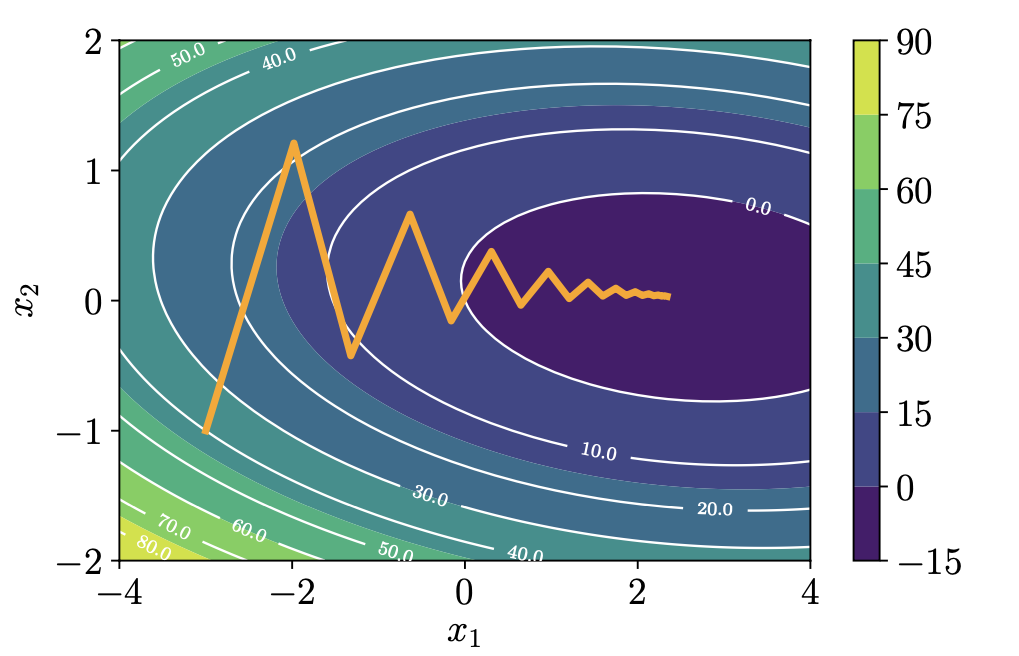

References:

1. Gilbert Strang, "Linear Algebra and Learning from Data," 2019. [Online] Available at: math.mit.edu/learningfromdata.

2. Charu C. Aggarwal, "Linear Algebra and Optimization for Machine Learning," 2019.

3. M. P. Deisenroth, A. A. Faisal, C. S. Ong, "Mathematics for Machine Learning," 2020. [Online] Available at: https://mml-book.com.
